<a href="https://colab.research.google.com/github/pouriazzz/jupyter_files/blob/main/model3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
train_path = "/content/drive/MyDrive/RGBS/Train"
test_path = "/content/drive/MyDrive/RGBS/Test"
validation_path = "/content/drive/MyDrive/RGBS/Validation"
# train_path = "/content/drive/MyDrive/RGBS/Train"
# test_path = "/content/drive/MyDrive/RGBS/Test"
# validation_path = "/content/drive/MyDrive/RGBS/Validation"

# train_path = "E:\\RGBS\\RGBS\\Train"
# test_path = "E:\\RGBS\\RGBS\\Test"
# validation_path = "E:\\RGBS\\RGBS\\Validation"

In [3]:
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np

In [4]:
train = keras.utils.image_dataset_from_directory(
                          directory=train_path,
                          labels="inferred",
                          label_mode="binary",
                          class_names=["Benign","Malware"],
                          batch_size=32,
                          image_size=(256, 256),
                          shuffle=True,
                          seed=None,
                          validation_split=None,
                          subset=None,
                          interpolation="bilinear",
                          follow_links=False,
                          crop_to_aspect_ratio=False,

)

Found 8715 files belonging to 2 classes.


In [5]:
test = keras.utils.image_dataset_from_directory(
                          directory=test_path,
                          labels="inferred",
                          label_mode="binary",
                          class_names=["Benign","Malware"],
                          batch_size=32,
                          image_size=(256, 256),
                          shuffle=True,
                          seed=None,
                          validation_split=None,
                          subset=None,
                          interpolation="bilinear",
                          follow_links=False,
                          crop_to_aspect_ratio=False,

)

Found 2482 files belonging to 2 classes.


In [6]:
validation = keras.utils.image_dataset_from_directory(
                          directory=validation_path,
                          labels="inferred",
                          label_mode="binary",
                          class_names=["Benign","Malware"],
                          batch_size=32,
                          image_size=(256, 256),
                          shuffle=True,
                          seed=None,
                          validation_split=None,
                          subset=None,
                          interpolation="bilinear",
                          follow_links=False,
                          crop_to_aspect_ratio=False,

)

Found 1240 files belonging to 2 classes.


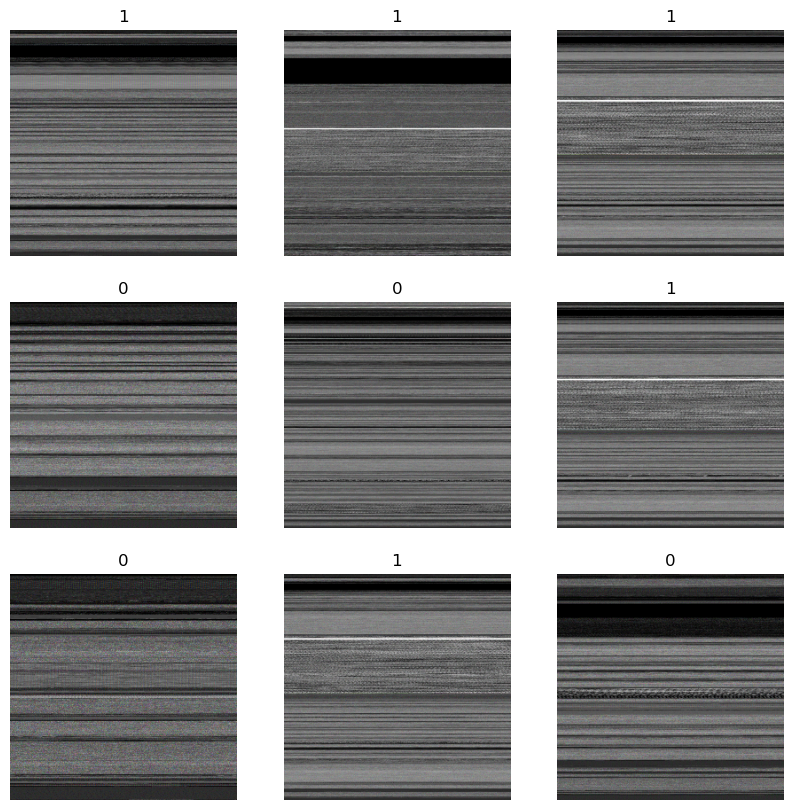

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [7]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train = train.map(process)
test = test.map(process)

In [8]:
from keras import regularizers


model = Sequential()
model.add(Conv2D(64,3,padding="same", activation="relu", input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(128, 3, padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, 3, padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation="relu",kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),bias_regularizer=regularizers.L2(1e-4),activity_regularizer=regularizers.L2(1e-5)))
model.add(Dropout(0.4))
model.add(Dense(256,activation="relu",kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),bias_regularizer=regularizers.L2(1e-4),activity_regularizer=regularizers.L2(1e-5)))
model.add(Dropout(0.3))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 128)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 64, 64, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 256)       2

In [9]:
opt = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer = opt , loss = "binary_crossentropy" , metrics = ['accuracy'])

In [10]:
history = model.fit(train,epochs = 25 ,batch_size = 128, validation_data = test)

Epoch 1/25
273/273 [==============================] - 161s 383ms/step - loss: 3.3748 - accuracy: 0.7316 - val_loss: 2.7854 - val_accuracy: 0.7732
Epoch 2/25
273/273 [==============================] - 104s 377ms/step - loss: 2.2310 - accuracy: 0.8576 - val_loss: 1.7740 - val_accuracy: 0.8723
Epoch 3/25
273/273 [==============================] - 96s 347ms/step - loss: 1.4182 - accuracy: 0.8755 - val_loss: 1.0879 - val_accuracy: 0.8864
Epoch 4/25
273/273 [==============================] - 104s 376ms/step - loss: 0.8732 - accuracy: 0.8882 - val_loss: 0.6568 - val_accuracy: 0.8965
Epoch 5/25
273/273 [==============================] - 95s 341ms/step - loss: 0.5600 - accuracy: 0.8963 - val_loss: 0.4714 - val_accuracy: 0.9017
Epoch 6/25
273/273 [==============================] - 104s 375ms/step - loss: 0.4535 - accuracy: 0.9040 - val_loss: 0.4268 - val_accuracy: 0.9065
Epoch 7/25
273/273 [==============================] - 103s 374ms/step - loss: 0.4283 - accuracy: 0.9046 - val_loss: 0.4205 - v

In [12]:
model.save("/content/drive/MyDrive")

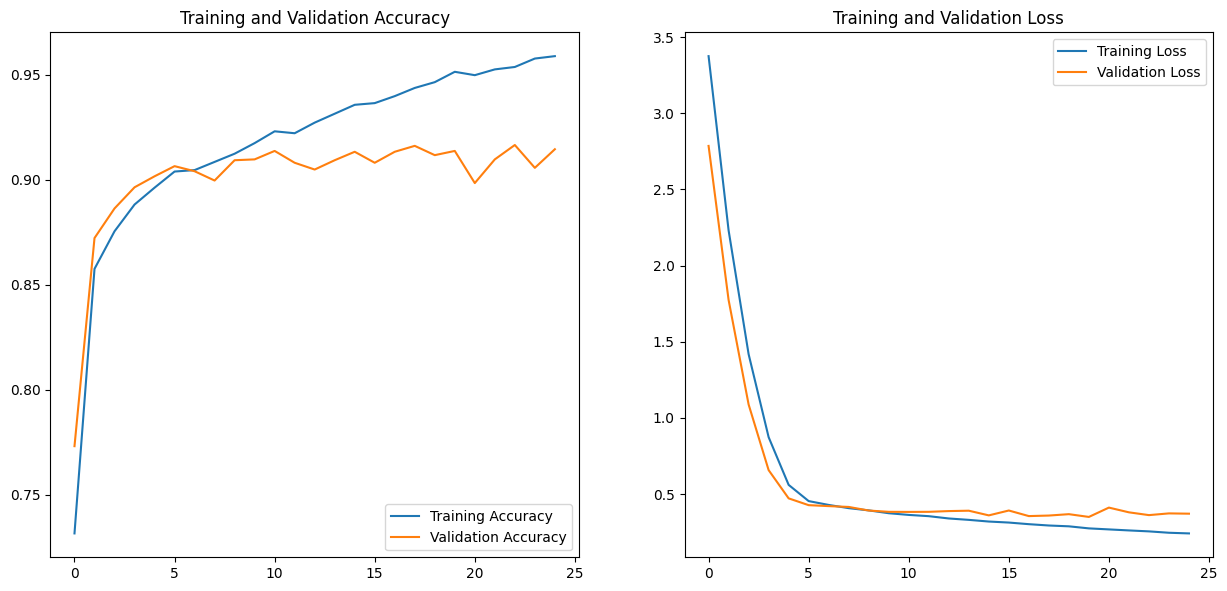

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()